# Obtendo dados

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import keras
import numpy as np

In [2]:
import scipy.io
import cv2
%matplotlib notebook 
import matplotlib.pyplot as plt

In [3]:
mat = scipy.io.loadmat("data/emnist-balanced.mat")
dataset = mat["dataset"][0][0]

In [4]:
train = dataset[0][0][0]
test = dataset[1][0][0]

In [45]:
train_features = train[0]
train_labels = train[1]

test_features = test[0]
test_labels = test[1]

### Convertendo labels para letras

In [46]:
def convertLabels(labels):
    converted = []
    for i in range(len(labels)):
        if labels[i] < 10:
            offset = 48
        elif labels[i] < 36:
            offset = 65-10
        elif labels[i] < 38:
            offset = 97-36
        elif labels[i] < 43:
            offset = 100 - 38
        elif labels[i] == 43:
            offset = 110 - 43
        elif labels[i] < 46:
            offset = 113 - 44
        else:
            offset = 116-46
    
        converted.append(chr(labels[i]+offset))
    
    return converted

In [47]:
train_labels = convertLabels(train_labels)
test_labels = convertLabels(test_labels)

In [48]:
np.unique(train_labels)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd',
       'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'], dtype='<U1')

In [49]:
train_labels[:3]

['r', 'a', 'n']

### Convertendo imagens de 28x28 em 32x32

In [51]:
def convertFeatures(features):
    converted = []
    
    for f in features:
        image = f.reshape(28,28)
        image = np.fliplr(image)
        image = np.rot90(image)
        image = cv2.resize(image, (32,32))
        converted.append(image)
    
    converted = np.array(converted)
    converted = converted.reshape(-1,32,32,1)
    return converted

In [52]:
train_features = convertFeatures(train_features)
test_features = convertFeatures(test_features)

### Visualizando dos dados

In [12]:
print(train_features.shape)
print(test_features.shape)

(112800, 32, 32, 1)
(18800, 32, 32, 1)


<IPython.core.display.Javascript object>


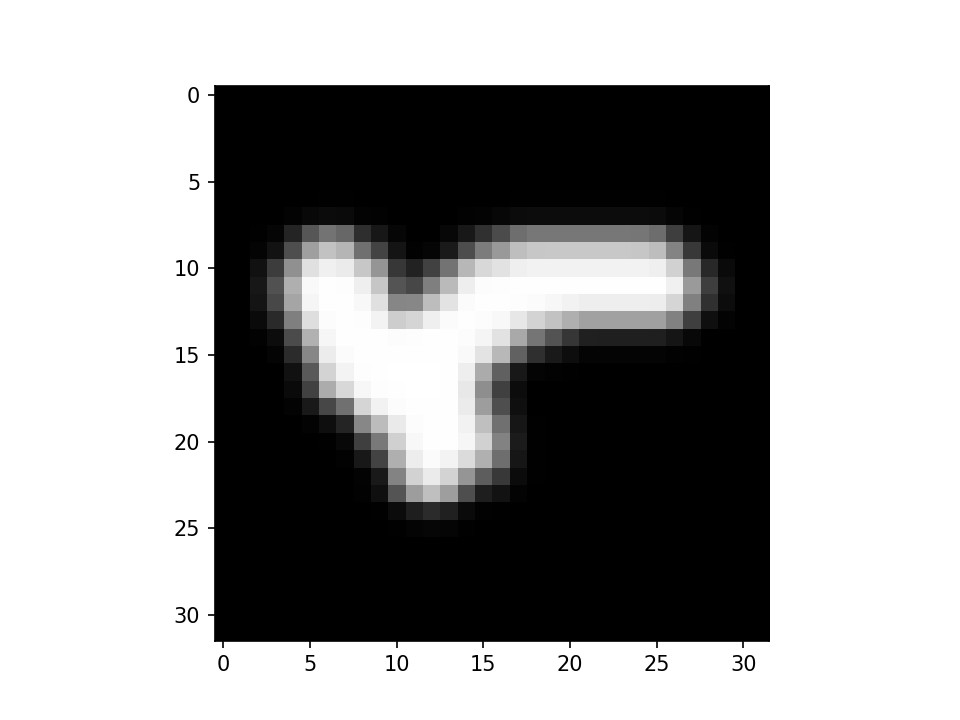

r


In [53]:
plt.figure()
plt.imshow(train_features[0].reshape(32,32), cmap='gray')
print(train_labels[0])

<IPython.core.display.Javascript object>


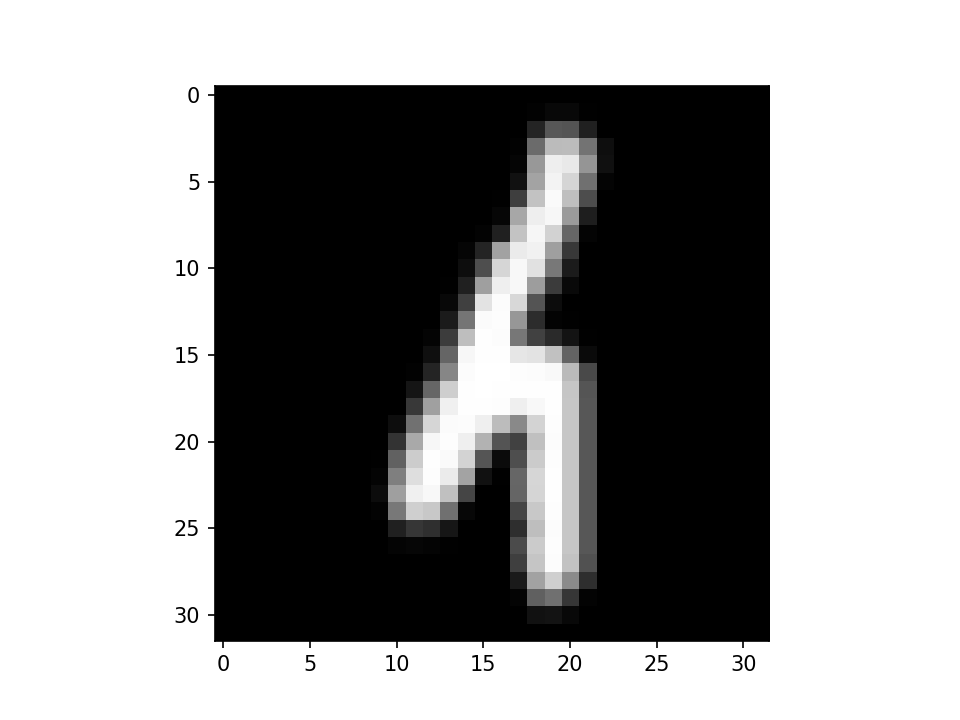

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0.]


<IPython.core.display.Javascript object>


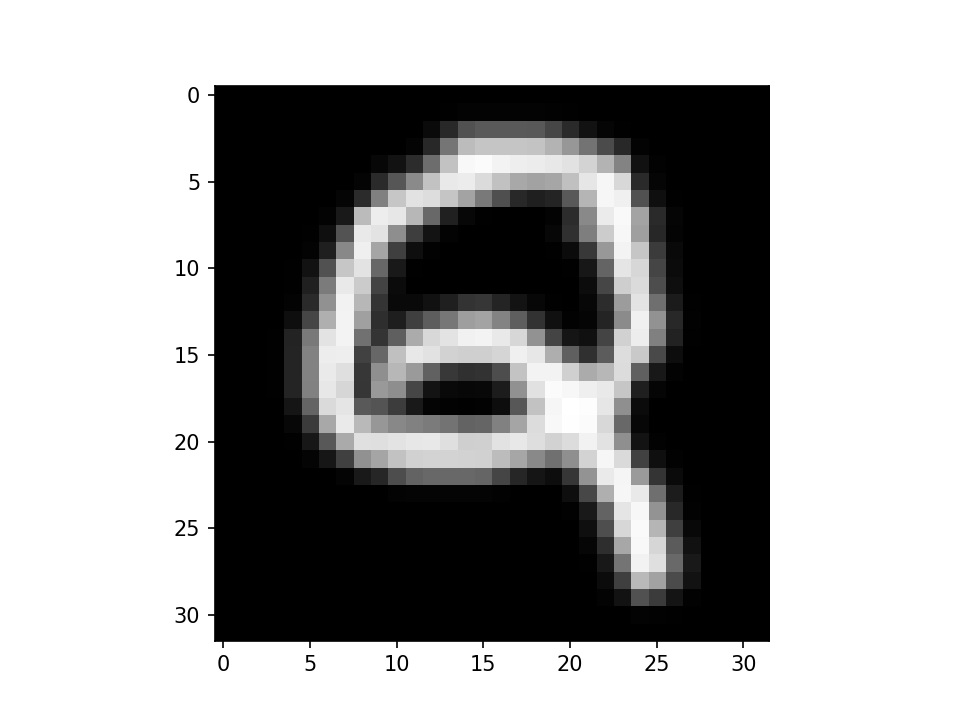

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


<IPython.core.display.Javascript object>


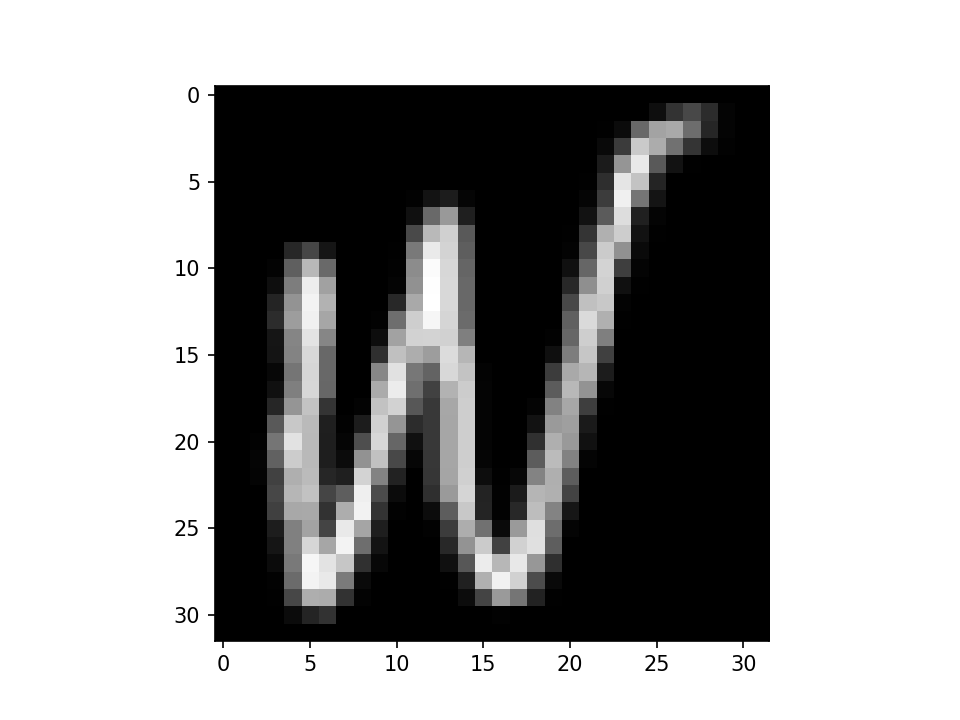

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


<IPython.core.display.Javascript object>


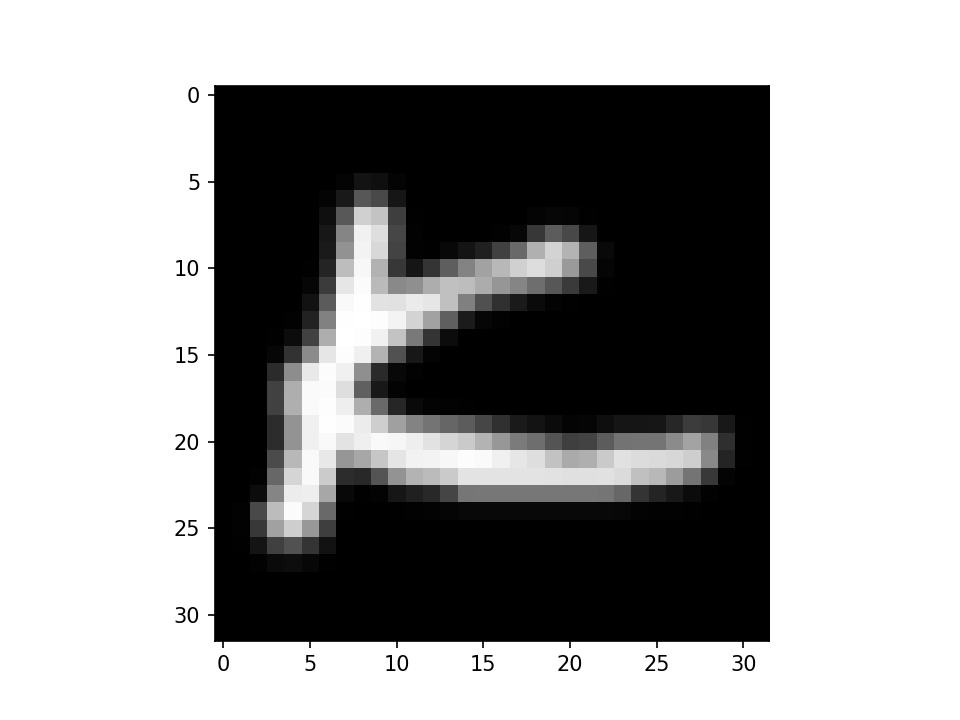

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


<IPython.core.display.Javascript object>


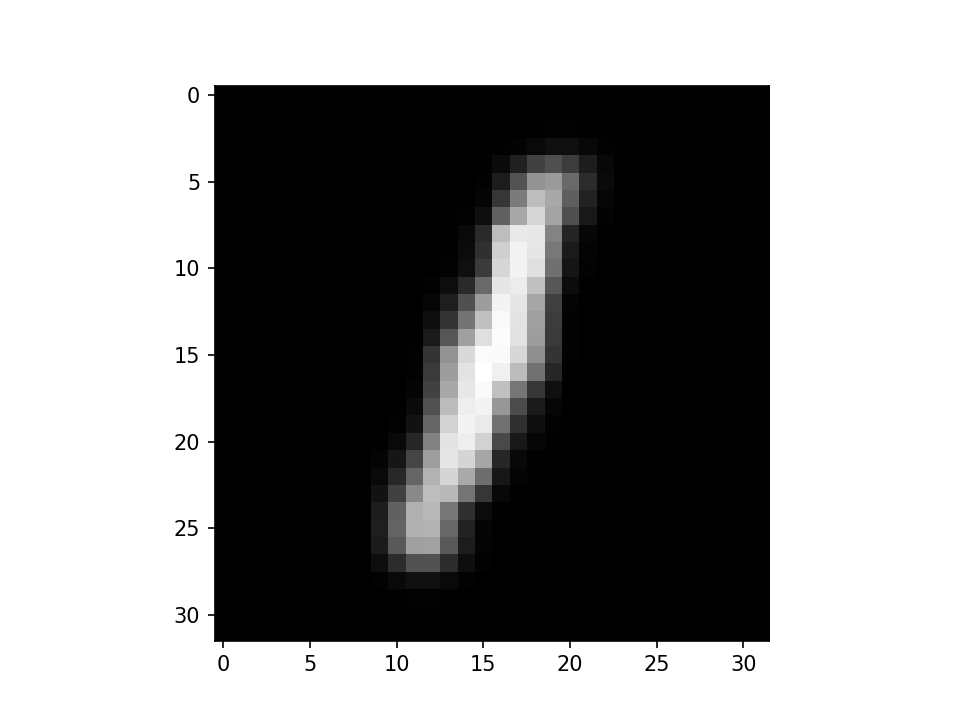

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [70]:
for i in range(5,10):
    plt.figure()
    plt.imshow(train_features[i].reshape(32,32), cmap='gray')
    print(train_labels[i])

### Label one hot encode

In [62]:
with open("model/classes.txt",'r') as f:
    classes = f.readlines()[0]

classes = np.array(classes.split(" ")[:-1])

Converte alguns caracteres das classes, pois o dataset é diferente

'k' -> 'K'

's' -> 'S'

'u' -> 'U'

'v' -> 'V'

'x' -> 'X'

'z' -> 'Z'

In [67]:
classes = np.where(classes=='k', 'K', classes) 
classes = np.where(classes=='s', 'S', classes) 
classes = np.where(classes=='u', 'U', classes) 
classes = np.where(classes=='v', 'V', classes) 
classes = np.where(classes=='x', 'X', classes) 
classes = np.where(classes=='z', 'Z', classes)
classes.sort()
print(classes)

['+' '-' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F'
 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X'
 'Y' 'Z' 'a' 'b' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'm' 'n' 'q' 'r' 't' 'Ç']


In [94]:
classesEmnist = np.delete(classes, np.where(classes == '+'))
classesEmnist = np.delete(classesEmnist, np.where(classesEmnist == '-'))
classesEmnist = np.delete(classesEmnist, np.where(classesEmnist == 'Ç'))
classesEmnist = np.delete(classesEmnist, np.where(classesEmnist == 'i'))
classesEmnist = np.delete(classesEmnist, np.where(classesEmnist == 'j'))
classesEmnist = np.delete(classesEmnist, np.where(classesEmnist == 'm'))
print(classesEmnist)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'd' 'e' 'f' 'g' 'h' 'n' 'q' 'r' 't']


In [68]:
def oneHotEncode(labels):
    ''' Codifica os labels usando One Hot Encoding
    '''
    converted = []

    for i in labels:
        encoded = np.zeros(classes.shape[0])
        idx = np.where(classes == i)
        encoded[idx] = 1
        converted.append(encoded)

    converted = np.array(converted)

    return converted

def oneHotDecode(label):
    '''Informa qual é a classe a partir do label
       codificado
    '''
    index = np.argmax(label)

    return classes[index]

In [69]:
train_labels = oneHotEncode(train_labels)
test_labels = oneHotEncode(test_labels)

# Carregando rede neural

In [100]:
dir = "model/"
model = keras.models.load_model(dir)

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 80)        800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 29, 80)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 29, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 27, 64)        46144     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 13, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 13, 64)         0

# Criando rede

In [39]:
inputShape = train_features[0].shape[0]
numClasses = len(classes)

print("- Tamanho linear dos dados de entrada: %d" % inputShape)

- Tamanho linear dos dados de entrada: 32


In [77]:
model = keras.Sequential()

model.add(keras.layers.Lambda(lambda image: image * (1/255.0), input_shape = (inputShape,inputShape,1)))

model.add(keras.layers.Conv2D(80, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,1)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation='softmax'))

# Retreinando rede

In [106]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
checkDir = "checkpoint/"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkDir,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [107]:
history = model.fit(train_features, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_features, test_labels), callbacks=[model_checkpoint_callback])

Epoch 1/10
441/441 [==============================] - 88s 199ms/step - loss: 3.0853 - accuracy: 0.3880 - val_loss: 0.5820 - val_accuracy: 0.8176
Epoch 2/10
441/441 [==============================] - 87s 198ms/step - loss: 0.7848 - accuracy: 0.7564 - val_loss: 0.4615 - val_accuracy: 0.8459
Epoch 3/10
441/441 [==============================] - 87s 198ms/step - loss: 0.6124 - accuracy: 0.7996 - val_loss: 0.4085 - val_accuracy: 0.8634
Epoch 4/10
441/441 [==============================] - 87s 196ms/step - loss: 0.5416 - accuracy: 0.8202 - val_loss: 0.3871 - val_accuracy: 0.8668
Epoch 5/10
274/441 [=================>............] - ETA: 32s - loss: 0.4975 - accuracy: 0.8316

KeyboardInterrupt: 

# Avaliando acurácia

In [102]:
_, accuracy = model.evaluate(train_features, train_labels)
print("Acurácia do modelo nos dados de treino: %.2f%%" % (accuracy*100.0))

3525/3525 [==============================] - 12s 3ms/step - loss: 13.3692 - accuracy: 0.2285
Acurácia do modelo nos dados de treino: 22.85%


In [82]:
_, accuracy = model.evaluate(test_features, test_labels)
print("Acurácia do modelo nos dados de teste: %.2f%%" % (accuracy*100.0))

588/588 [==============================] - 2s 4ms/step - loss: 0.3751 - accuracy: 0.8704
Acurácia do modelo nos dados de teste: 87.04%


In [108]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_features, batch_size=256, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y = np.argmax(test_labels, axis=1)

74/74 [==============================] - 2s 27ms/step


In [109]:
cm = confusion_matrix(y, y_pred_bool)

<IPython.core.display.Javascript object>


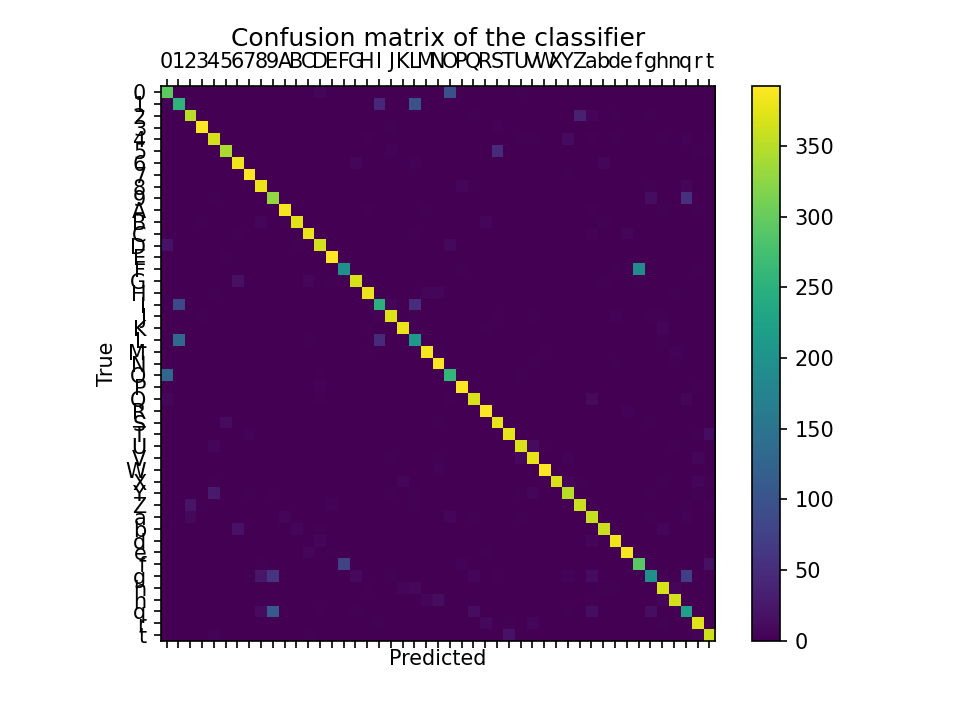

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(range(cm.shape[0]))
ax.set_yticks(range(cm.shape[1]))
ax.set_xticklabels(list(classesEmnist))
ax.set_yticklabels(list(classesEmnist))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [97]:
print(classification_report(y, y_pred_bool, target_names=classesEmnist))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       400
           1       0.53      0.69      0.60       400
           2       0.88      0.91      0.89       400
           3       0.98      0.97      0.98       400
           4       0.91      0.94      0.92       400
           5       0.93      0.89      0.91       400
           6       0.92      0.93      0.92       400
           7       0.97      0.98      0.97       400
           8       0.89      0.95      0.92       400
           9       0.65      0.82      0.72       400
           A       0.97      0.95      0.96       400
           B       0.97      0.94      0.95       400
           C       0.94      0.94      0.94       400
           D       0.91      0.91      0.91       400
           E       0.97      0.99      0.98       400
           F       0.71      0.56      0.62       400
           G       0.95      0.92      0.93       400
           H       0.98    

# Testando

In [98]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False, threshold = 0):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (32,32))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
        
    img = img.reshape((1,32,32,1))
    
    return img


def getChar(x, verbose = 0, threshold = 0.45):
    label = model.predict(x, batch_size=1)
    
    if verbose == 1:
        print(label)
    elif verbose == 2:
        print(np.amax(label[0]))
    
    if np.amax(label[0]) < threshold:
        print(np.amax(label[0]))
        char = '#NADA'
    else:
        char = oneHotDecode(label)
    
    return char

In [111]:
c = getChar(train_features[7].reshape(1,32,32,1), threshold = 0.1)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi W


<IPython.core.display.Javascript object>


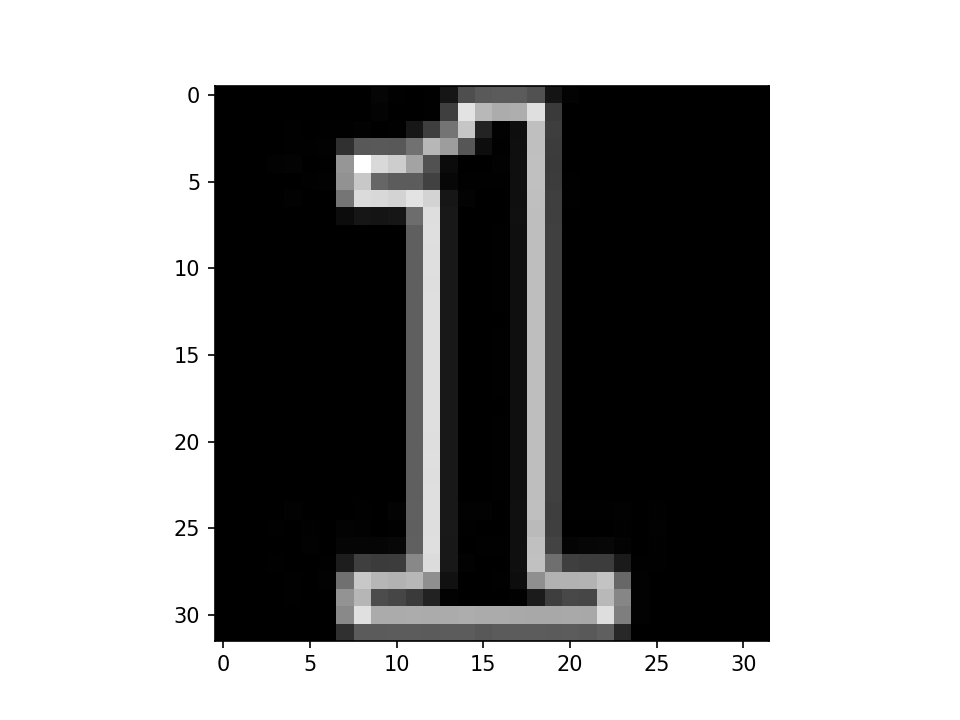

O caractere reconhecido foi 1


In [113]:
x = loadImage("testes/real12.png", True)
c = getChar(x, threshold = 0.3)
print("O caractere reconhecido foi %s" % c)

<IPython.core.display.Javascript object>


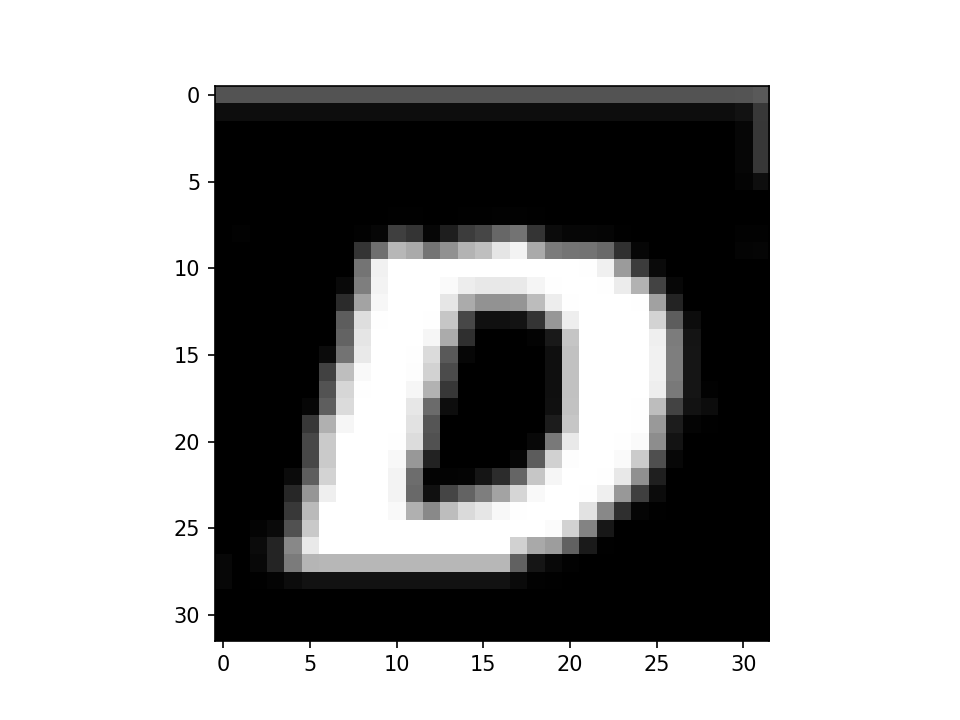

O caractere reconhecido foi D


In [114]:
x = loadImage("testes/real8.png", True)
c = getChar(x, threshold = 0.3)
print("O caractere reconhecido foi %s" % c)

<IPython.core.display.Javascript object>


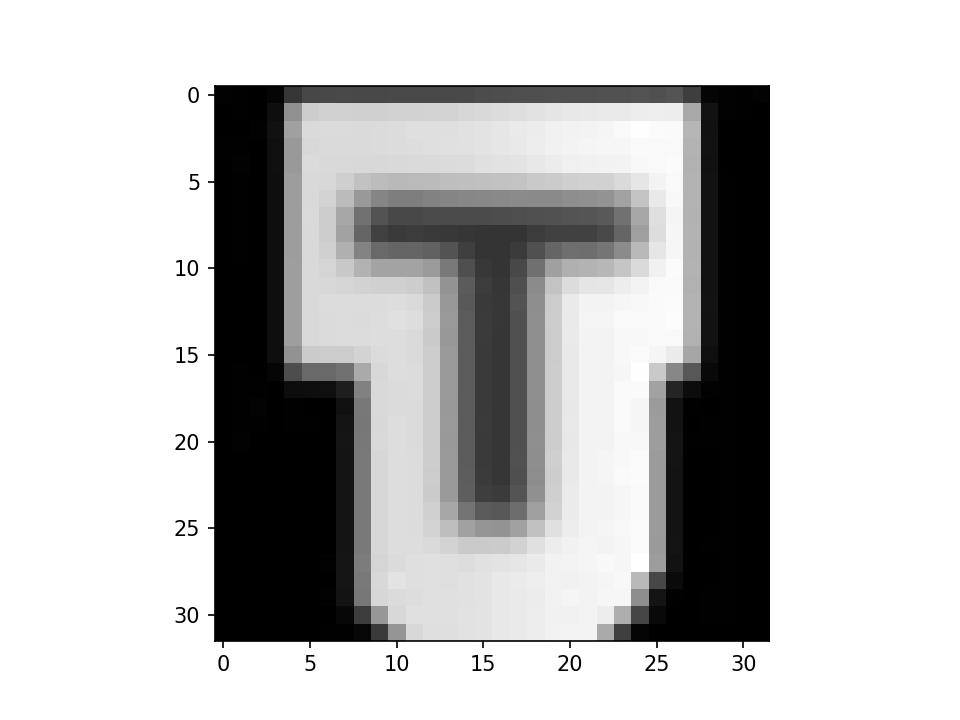

O caractere reconhecido foi 7


In [116]:
x = loadImage("testes/real7.png", True)
c = getChar(x, threshold = 0.2)
print("O caractere reconhecido foi %s" % c)